In [124]:
import cv2 as cv
from matplotlib import pyplot as plt

### Завантаження зображень та метод для зручного виведення

In [125]:
img = cv.imread("images/horse.png")
all_img = cv.imread("images/horses.jpg")

images, titles = [], []

def print1x3(images, titles):
    plt.figure(figsize=(15,10))
    for i, img in enumerate(images):
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(titles[i])
        plt.axis('off')

### Основна частина застосунку

In [126]:
# Перетворення зображень в відтінки сірого
gray_img, all_gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY), cv.cvtColor(all_img, cv.COLOR_BGR2GRAY)

# Застосування глобального порогу для бінаризації зображення
_, img_tresh = cv.threshold(gray_img, 127, 255, cv.THRESH_BINARY)
# Знаходження контурів в першому зображенні
img_contours, img_hierarchy = cv.findContours(img_tresh, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)

_, all_img_tresh = cv.threshold(all_gray_img, 127, 255, cv.THRESH_BINARY)
all_img_contours, all_img_hierarchy = cv.findContours(all_img_tresh, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)

# Відображення контурів на обох зображеннях зеленим кольором
cv.drawContours(img, img_contours, -1, color=(0, 255, 0), thickness=2)
cv.drawContours(all_img, all_img_contours, -1, color=(0, 255, 0), thickness=2)
print('-------------------------')

-------------------------


In [127]:
# Ініціалізація змінних для збереження найбільш схожих контурів
most_similar = float('inf')
contour1, contour2 = all_img_contours[0], img_contours[0]
all_img_find, img_find = all_img.copy(), img.copy()

# Цикл для порівняння всіх контурів між двома зображеннями
for i, all_img_contour in enumerate(all_img_contours):
    for j, img_contour in enumerate(img_contours):
        # Використання функції matchShapes для знаходження ступеню схожості контурів
        similarity =  cv.matchShapes(all_img_contour, img_contour, cv.CONTOURS_MATCH_I1, 0.0)
        if similarity < most_similar:
            most_similar = similarity
            contour1, contour2 = all_img_contours[i], img_contours[j]
            print(f"(all_img_countours[{i}] == img_countours[{j}]) = Simlarity Score: {most_similar:.15f}")

cv.drawContours(all_img_find, [contour1], -1, color=(255, 0, 0), thickness=2)
cv.drawContours(img_find, [contour2], -1, color=(50, 168, 168), thickness=2)
print('-------------------------')

(all_img_countours[0] == img_countours[0]) = Simlarity Score: 1.074109873972575
(all_img_countours[0] == img_countours[1]) = Simlarity Score: 0.534486076589077
(all_img_countours[0] == img_countours[3]) = Simlarity Score: 0.364561545842010
(all_img_countours[1] == img_countours[3]) = Simlarity Score: 0.287540465941155
(all_img_countours[3] == img_countours[0]) = Simlarity Score: 0.113537553586579
(all_img_countours[3] == img_countours[1]) = Simlarity Score: 0.040701438458471
(all_img_countours[6] == img_countours[0]) = Simlarity Score: 0.001001680137683
(all_img_countours[6] == img_countours[1]) = Simlarity Score: 0.000000000020869
(all_img_countours[8] == img_countours[3]) = Simlarity Score: 0.000000000000220
-------------------------


### Переглядаємо результати

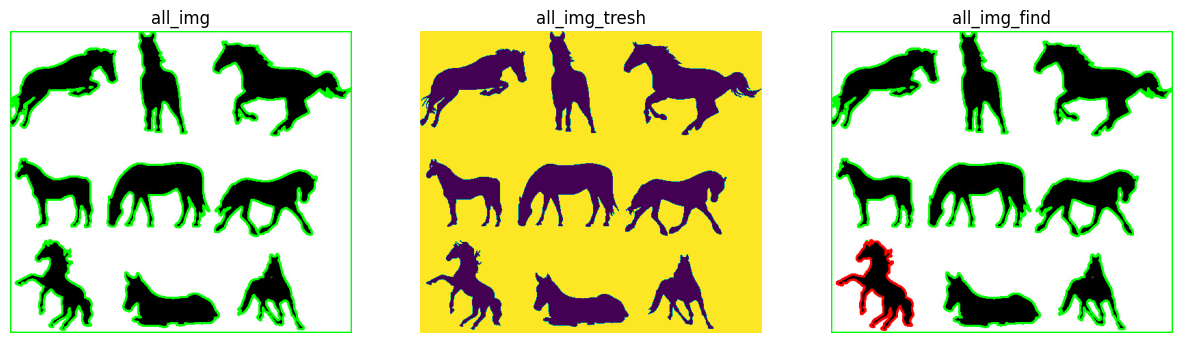

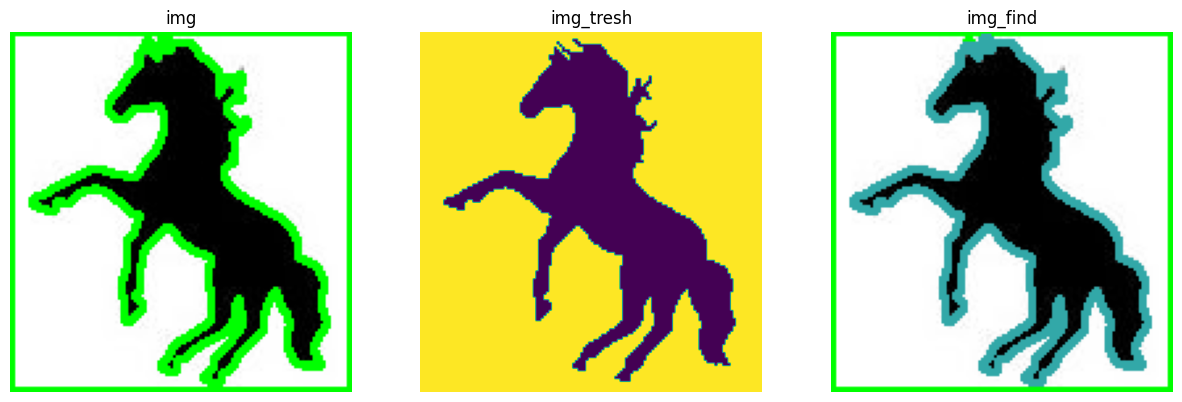

In [128]:
images = [all_img, all_img_tresh, all_img_find]
titles = ['all_img', 'all_img_tresh', 'all_img_find']
print1x3(images, titles)

images = [img, img_tresh, img_find]
titles = ['img', 'img_tresh', 'img_find']
print1x3(images, titles)

Переваги:
Це проста реалізація, яка дозволяє ефективно знайти схожі контури між двома зображеннями.
Ми отримуємо можливість візуалізувати результати для подальшої перевірки правильності роботи програми.
Недоліки:
Такий підхід підходить лише для простих контурів і може мати труднощі при роботі зі складними або детальними об'єктами.
Алгоритм чутливий до змін освітлення, масштабу та орієнтація об'єктів, що може вплинути на точність порівняння контурів.